In [1]:
#Importando as bibliotecas
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importando as informações do yahoo finance
tickers = ['NTDOY', 'SONY', 'MSFT', 'TCEHY']
mydata= pd.DataFrame()
for t in tickers:
    mydata[t]= wb.DataReader(t,data_source='yahoo', start='2012-1-1')['Adj Close']

In [3]:
# verificando se os dados estão completos e corretos
mydata.info

<bound method DataFrame.info of                 NTDOY       SONY        MSFT      TCEHY
Date                                                   
2012-01-03  17.510000  18.379999   21.527197   3.983209
2012-01-04  17.879999  18.219999   22.033819   3.965739
2012-01-05  17.490000  17.700001   22.258978   3.942445
2012-01-06  17.299999  17.440001   22.604763   3.872564
2012-01-09  17.410000  17.469999   22.307220   3.905564
...               ...        ...         ...        ...
2022-08-25  53.240002  85.260002  278.850006  42.299999
2022-08-26  52.200001  81.709999  268.089996  41.259998
2022-08-29  51.750000  81.339996  265.230011  40.750000
2022-08-30  51.430000  80.739998  262.970001  40.000000
2022-08-31  51.099998  79.349998  261.470001  41.299999

[2684 rows x 4 columns]>

In [4]:
#Normalizando os Dados para 100
mydata.iloc[0]

NTDOY    17.510000
SONY     18.379999
MSFT     21.527197
TCEHY     3.983209
Name: 2012-01-03 00:00:00, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

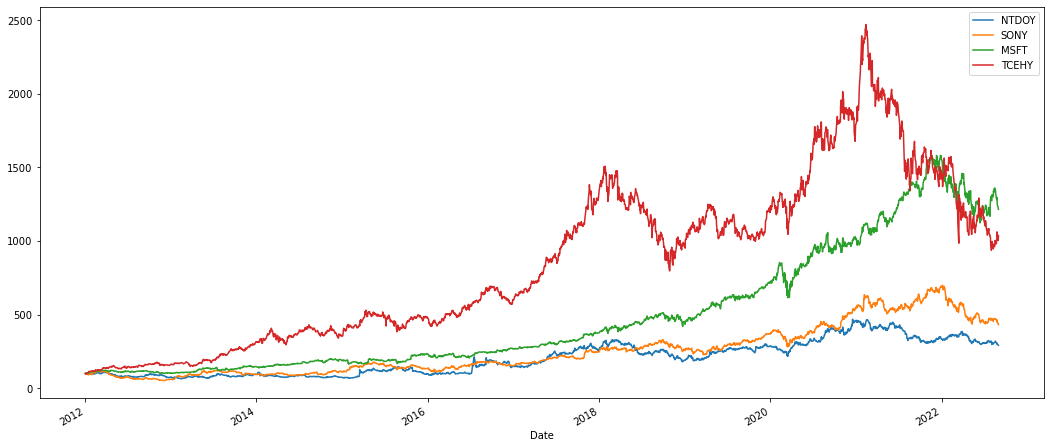

In [5]:
#Normalizando os dados
(mydata / mydata.iloc[0] * 100).plot(figsize=(18,8));
plt.show

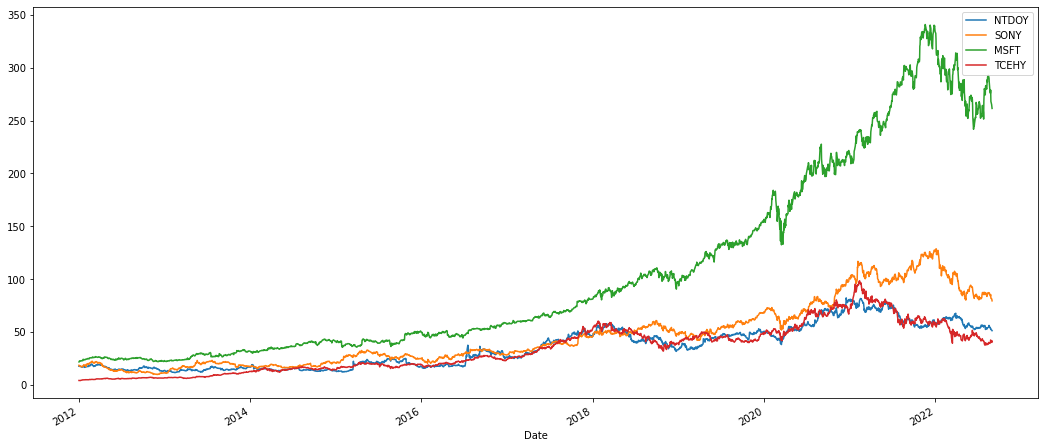

In [6]:
#Plotando com dados
mydata.plot(figsize=(18,8))
plt.show()

In [7]:
#Calculando os retornos simples de cada ação
retornos = (mydata / mydata.shift(1)) - 1
retornos.head()

,NTDOY,SONY,MSFT,TCEHY
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.021131,-0.008705,0.023534,-0.004386
2012-01-05,-0.021812,-0.028540,0.010219,-0.005874
2012-01-06,-0.010863,-0.014689,0.015535,-0.017725
2012-01-09,0.006358,0.001720,-0.013163,0.008521


In [8]:
# precisamos primeiro saber o peso de cada ação no portifolio, e 
# se assumirmos que o peso de cada ação no portifolio é 25%, então:
peso = np.array([0.25, 0.25, 0.25, 0.25])

In [9]:
#podemos obter o retorno anual de cada ação
retorno_anual = retornos.mean() * 250
retorno_anual

NTDOY    0.175363
SONY     0.187706
MSFT     0.266549
TCEHY    0.282389
dtype: float64

In [10]:
#assim, calculando o retorno total deste portifólio 
np.dot(retorno_anual, peso)

0.22800161323101534

In [12]:
#transformando o resultado em porcentagem
portifolio1 = str(round(np.dot(retorno_anual, peso), 5) * 100) + ' %'
print (portifolio1)

22.8 %


In [15]:
# Se a carteira tivesse ações com pesos diferentes, então:
peso_2= np.array([0.30, 0.50, 0.10, 0.10])

In [17]:
portifolio2=str(round(np.dot(retorno_anual, peso_2), 5) * 100) + ' %'
print (portifolio1)
print (portifolio2)

22.8 %
20.136000000000003 %
